# Matplotlib

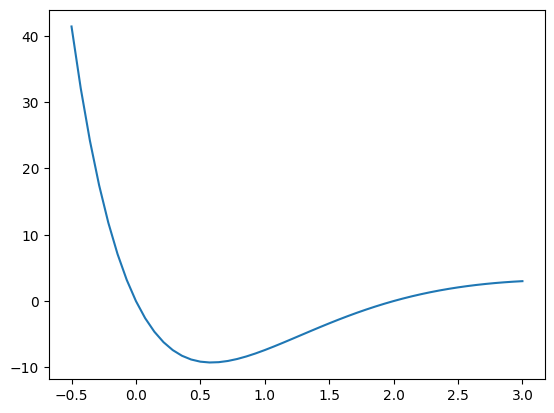

In [1]:
# Matplotlib is a powerful plotting library
# pyplot: state-based interface
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * (x - 2) * np.exp(3 - x)

x = np.linspace(-0.5, 3.0) # 50 values between -0.5 and 3.0
y = f(x)
plt.plot(x, y)
# plt.show() # if not working with an ipython console

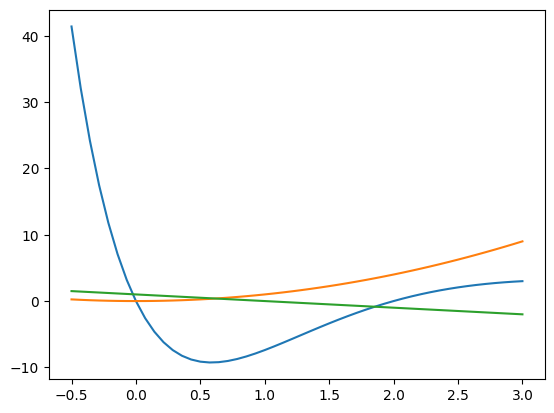

In [2]:
# Manually instantiate a Figure object prior to calling the plot routine
fig = plt.figure()
lines = plt.plot(x, f(x), x, x**2, x, 1 - x)

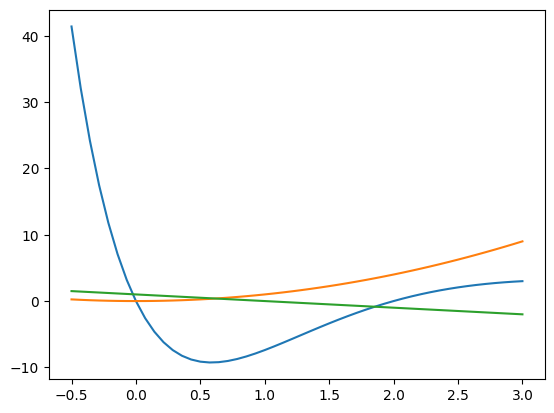

In [3]:
# Create a new 'figure' and explicitly create a set of 'axes' in this figure
fig, ax = plt.subplots()
l1 = ax.plot(x, f(x))
l1 = ax.plot(x, x**2)
l1 = ax.plot(x, 1 - x)

### Changing the style

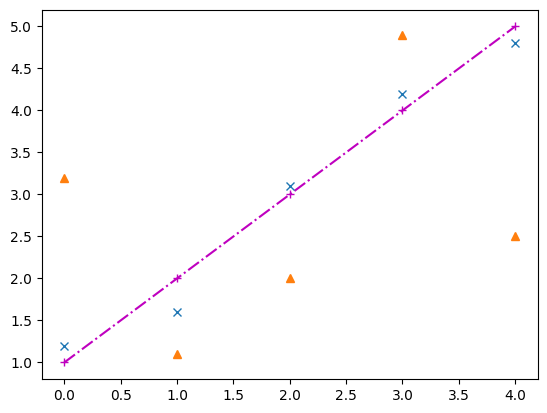

In [4]:
y1 = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y2 = np.array([1.2, 1.6, 3.1, 4.2, 4.8])
y3 = np.array([3.2, 1.1, 2.0, 4.9, 2.5])
fig, ax = plt.subplots()
# Use a format string
lines = ax.plot(y1, '+-.m', y2, 'x', y3, '^')  # '+' marker, '-.' dash-dot line, 'm' magenta

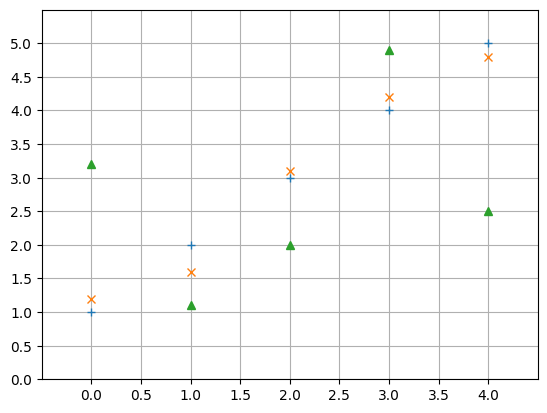

In [5]:
fig, ax = plt.subplots()
ax.axis([-0.5, 4.5, 0, 5.5]) # set axes
ax.set_xticks([0.5*i for i in range(9)]) # set xticks
ax.set_yticks([0.5*i for i in range(11)]) # set yticks
ax.grid()
lines = ax.plot(y1, '+', y2, 'x', y3, '^')

### Adding labels and legends

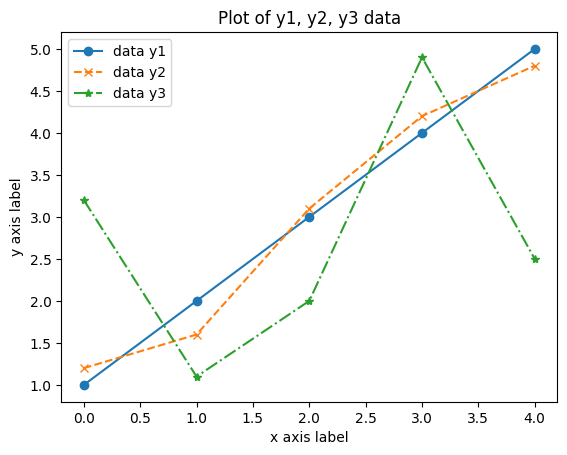

In [6]:
fig, ax = plt.subplots()
lines = ax.plot(y1, "o-", y2, "x--", y3, "*-.")
ax.set_title("Plot of y1, y2, y3 data")
ax.set_xlabel("x axis label")
ax.set_ylabel("y axis label")
ax.legend(("data y1", "data y2", "data y3"))

### Adding subplots

iterates: [2.0, 1.25, 1.025, 1.0003048780487804, 1.0000000464611474, 1.000000000000001, 1.0]
errors: [1.0, 0.25, 0.02499999999999991, 0.00030487804878043256, 4.6461147373833e-08, 1.1102230246251565e-15, 0.0]


Text(0, 0.5, 'Error')

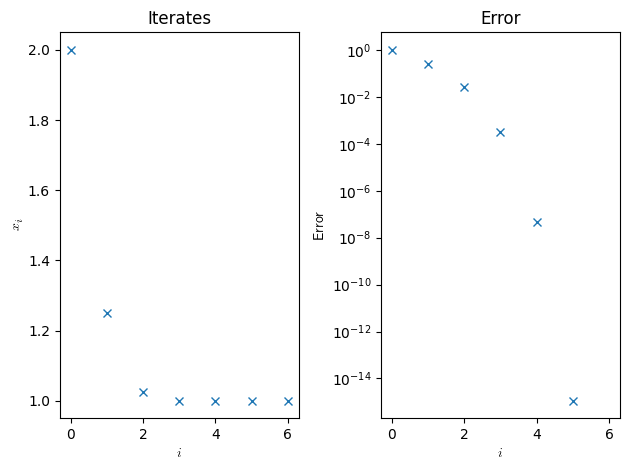

In [7]:
# Newton's method (Newton-Rapshon) for f(x) = x**2 - 1
def generate_newton_iters(x0, number):
    iterates = [x0]
    errors = [abs(x0 - 1.)]
    for _ in range(number):
        x0 = x0 - (x0*x0 - 1.)/(2*x0)
        iterates.append(x0)
        errors.append(abs(x0 - 1.))
    return iterates, errors

iterates, errors = generate_newton_iters(2.0, 6)
print('iterates:', iterates)
print('errors:', errors)
fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True)  # 1 row, 2 columns

# axe 1
ax1.plot(iterates, 'x')
ax1.set_title('Iterates')
ax1.set_xlabel('$i$', usetex=True)
ax1.set_ylabel('$x_i$', usetex=True)

# axe 2
ax2.semilogy(errors, 'x')
ax2.set_title('Error')
ax2.set_xlabel('$i$', usetex=True)
ax2.set_ylabel('Error', usetex=True)

### Saving figures

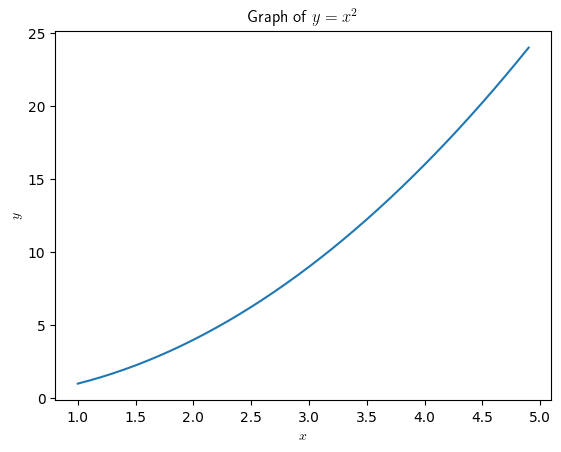

In [8]:
# Data
x = np.arange(1, 5, 0.1)
y = x*x
# Create a figure, add labels...
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Graph of $y = x^2$', usetex=True)
ax.set_xlabel('$x$', usetex=True)
ax.set_ylabel('$y$', usetex=True)
# Save file
fig.savefig('lefig.png', dpi=300)

###  3D plots (surface and countour)

Text(0.5, 0.92, 'Graph of the function $f(x) = 1/(x^2 + y^2)$')

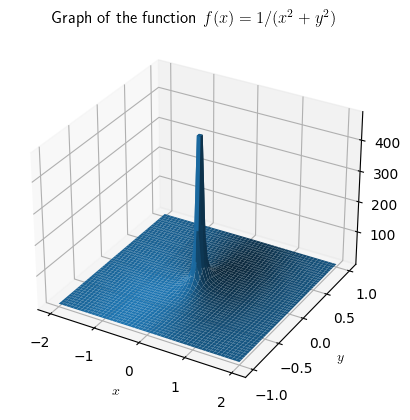

In [9]:
# Plot f(x, y) = 1/(x**2 + y**2)
X = np.linspace(-2, 2)
Y = np.linspace(-1, 1)
# Create a grid for the z values
x, y = np.meshgrid(X, Y)
z = 1/(x**2+y**2)
# Create a figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')  # declare 3d plot
ax.plot_surface(x, y, z)
ax.set_xlabel('$x$', usetex=True)
ax.set_ylabel('$y$', usetex=True)
ax.set_zlabel('$z$', usetex=True)
ax.set_title('Graph of the function $f(x) = 1/(x^2 + y^2)$', usetex=True)